In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
df_train = pd.read_csv('/content/gdrive/MyDrive/CSE256_SP23/project/medical_abstract_data/medical_tc_train.csv', index_col=0)
df_test = pd.read_csv('/content/gdrive/MyDrive/CSE256_SP23/project/medical_abstract_data/medical_tc_test.csv', index_col=0)

df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)


Mounted at /content/gdrive


In [9]:
df = (pd.concat([df_train, df_test], axis=0).reset_index())[['condition_label', 'medical_abstract']]
df.rename(columns = {'condition_label':'category', 'medical_abstract':'text'}, inplace = True)
df

,category,text
0,5,Tissue changes around loose prostheses. A cani...
1,1,Neuropeptide Y and neuron-specific enolase lev...
2,2,"Sexually transmitted diseases of the colon, re..."
3,1,Lipolytic factors associated with murine and h...
4,3,Does carotid restenosis predict an increased r...
...,...,...
14433,4,Management of aortobronchial fistula with graf...
14434,5,Tuberculous psoas muscle abscess following che...
14435,4,Clinical evaluation of high-frequency (ultraso...
14436,1,Antitumor activity of liposome-encapsulated do...


In [4]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf



<Axes: ylabel='count'>

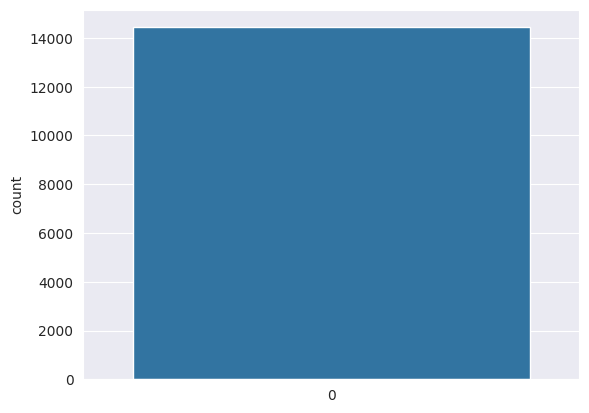

In [10]:
sns.set_style("darkgrid")
sns.countplot(df.category)

In [14]:
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)



def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['text']=df['text'].apply(denoise_text)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-14-fb41d55a6ffc>:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


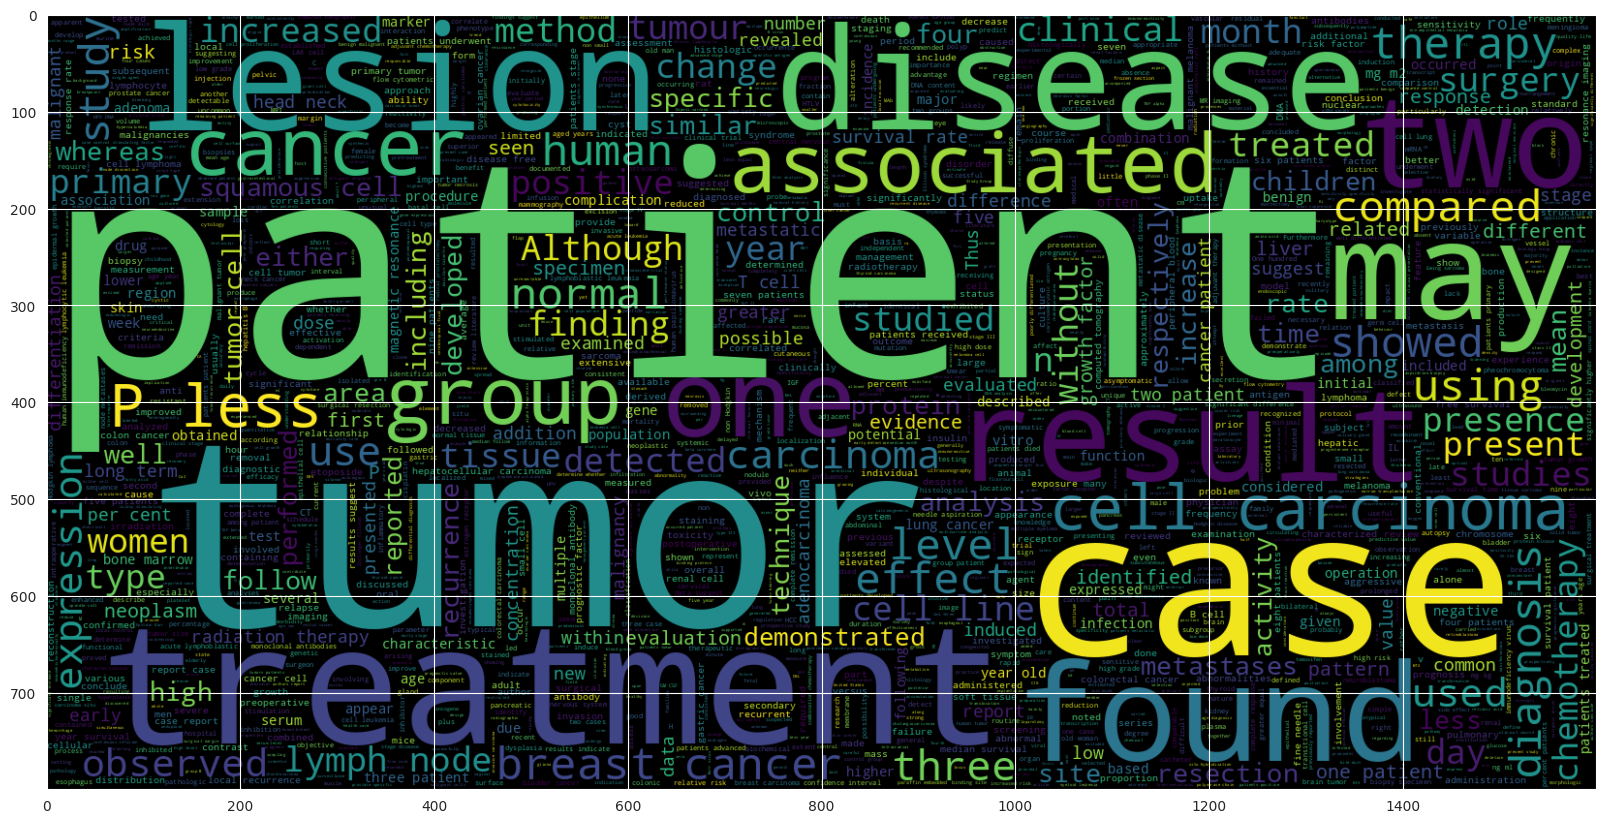

In [15]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')



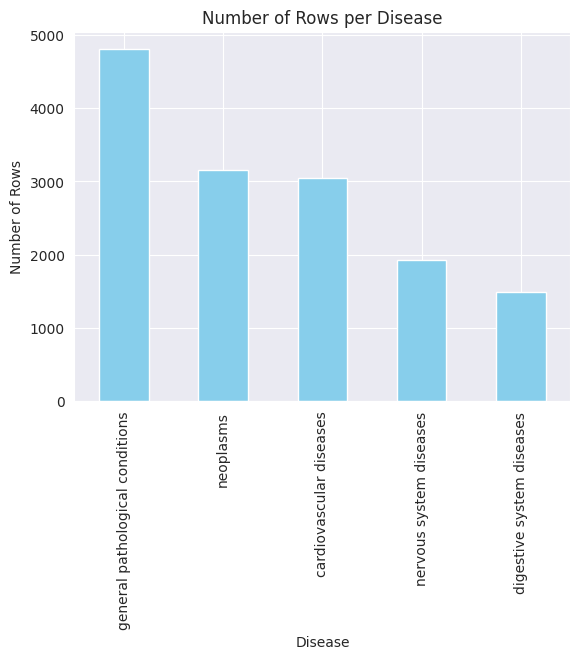

In [17]:
import matplotlib.pyplot as plt

# Assuming your dataframe is named df
disease_dict = {1: 'neoplasms', 2:'digestive system diseases', 3:'nervous system diseases', 4:'cardiovascular diseases', 5:'general pathological conditions'}
df['disease'] = df.apply(lambda row: disease_dict[row.category], axis=1)


category_counts = df['disease'].value_counts()

category_counts.plot(kind='bar', color='skyblue')

plt.title('Number of Rows per Disease')
plt.xlabel('Disease')
plt.ylabel('Number of Rows')
plt.show()